In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

from IPython.display import Image 

%matplotlib inline

In [2]:
PATH = "./data/tf_speech/"
audio_path = f'{PATH}train/audio/'
pict_Path = f'{PATH}picts/train/'
test_pict_Path = f'{PATH}picts/test/'
test_audio_path = f'{PATH}test/audio/'
samples = []

Get folders:

In [3]:
#if not os.path.exists(pict_Path):
    #os.makedirs(pict_Path)

#if not os.path.exists(test_pict_Path):
    #os.makedirs(test_pict_Path)
    
subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        #if not os.path.exists(pict_Path + '/' + x):
            #os.makedirs(pict_Path +'/'+ x)

Get sample of each category and count all

In [4]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total)

count: 2353 : left
count: 2357 : five
count: 1713 : bed
count: 2376 : zero
count: 6 : _background_noise_
count: 2372 : go
count: 2375 : no
count: 2357 : off
count: 1745 : wow
count: 2356 : three
count: 2369 : six
count: 2359 : down
count: 1731 : bird
count: 1750 : house
count: 2380 : stop
count: 2352 : eight
count: 1733 : cat
count: 1746 : dog
count: 2377 : yes
count: 2373 : two
count: 2367 : on
count: 2370 : one
count: 1746 : marvin
count: 1742 : happy
count: 1734 : sheila
count: 2372 : four
count: 2375 : up
count: 2367 : right
count: 1733 : tree
count: 2377 : seven
count: 2364 : nine
64727


In [5]:
sample_audio[0]

'./data/tf_speech/train/audio/left/7ea032f3_nohash_4.wav'

Preview of spectrograms across different words:

In [6]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)


/home/mtolstokory/anaconda3/envs/42/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


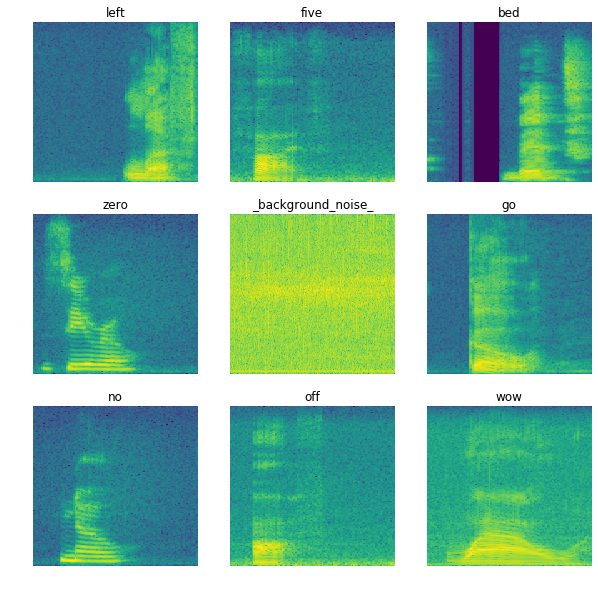

In [7]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

Spectrograms within the same category:

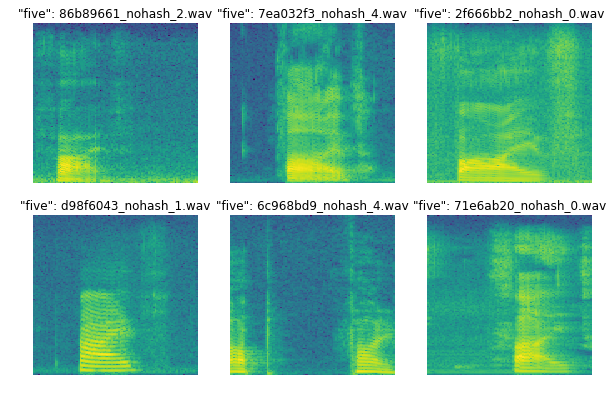

In [8]:
five_samples = [audio_path + 'five/' + y for y in os.listdir(audio_path + 'five/')[:6]]

fig = plt.figure(figsize=(10,10))

for i, filepath in enumerate(five_samples):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-1]
    plt.title('"five": '+label)
    
    # create spectogram
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')


Waveforms across different words:

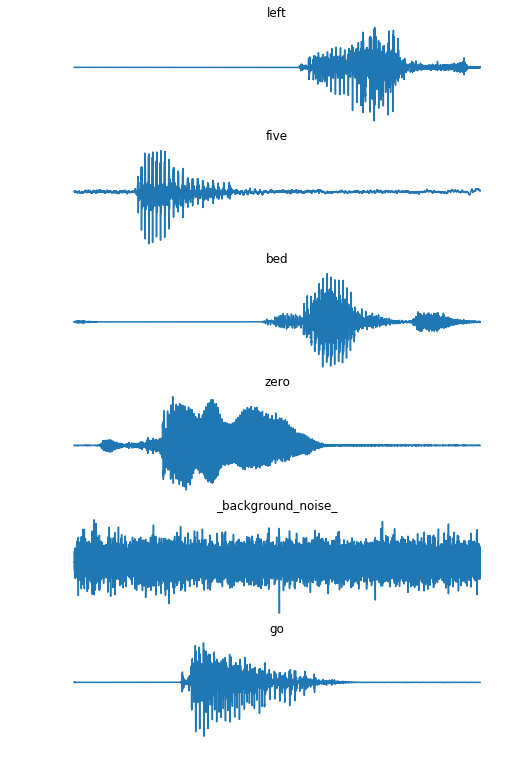

In [9]:
fig = plt.figure(figsize=(8,20))
for i, filepath in enumerate(sample_audio[:6]):
    plt.subplot(9,1,i+1)
    samplerate, test_sound  = wavfile.read(filepath)
    plt.title(filepath.split('/')[-2])
    plt.axis('off')
    plt.plot(test_sound)

Take a look at provided validation list:

In [1]:
!cat data/tf_speech/train/validation_list.txt | head

bed/026290a7_nohash_0.wav
bed/060cd039_nohash_0.wav
bed/060cd039_nohash_1.wav
bed/099d52ad_nohash_0.wav
bed/0e17f595_nohash_0.wav
bed/0e17f595_nohash_1.wav
bed/105e72bb_nohash_0.wav
bed/1657c9fa_nohash_0.wav
bed/16db1582_nohash_0.wav
bed/171b56dc_nohash_0.wav
cat: write error: Broken pipe


Functions for converting audio to pictures, NEEDS DEBUGGING:

In [11]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """

    fig = plt.figure(figsize=figsize)    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.imsave('%s.png' % output_file, spectrogram, dpi = (300))
    plt.close()

In [12]:
def wav2img_waveform(wav_path, targetdir='', figsize=(4,4)):
    samplerate,test_sound  = wavfile.read(sample_audio[0])
    fig = plt.figure(figsize=figsize)
    plt.plot(test_sound)
    plt.axis('off')
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.savefig('%s.png' % output_file)
    plt.close()

Convert training audios (NEEDS DEBUGGING):

for i, x in enumerate(subFolderList[:3]):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files[:1000]:
        wav2img(audio_path + x + '/' + file, pict_Path + x)

Convert test audios:

all_files = [y for y in os.listdir(test_audio_path + x) if '.wav' in y]
for file in all_files:
    wav2img(test_audio_path + x + '/' + file, test_pict_Path + x)

INSTEAD CONVERT AUDIOS TO SPECTROGRAMS USING SOX IN BASH:

In [13]:
%%bash -s $audio_path 
#pass python variables to bash

#create synthetic silence data from quiet random noise

silence_path="$1silence/"

if [[ ! -d $silence_path  ]];then
	mkdir -p $silence_path
fi

#generate 700*3 = 2100 random quiet noise wavs
for i in `seq 1 700`;
do
	name=$(printf "noise%04d." "$i")
	wav="wav"
	white="white"
	pink="pink"
	brown="brown"
	#vary the level of noise from 0.1 to 0.5:
	lvl=$(( $RANDOM % 5 + 1 ))
	lvl=$( bc -l <<< "scale=1 ; ${lvl}/10" )
	#echo $lvl
	sox -n -r 16000 -c 1 -b 16 "$silence_path$white$name$wav" synth 0:01 whitenoise vol $lvl
	sox -n -r 16000 -c 1 -b 16 "$silence_path$pink$name$wav" synth 0:01 pinknoise vol $lvl
	sox -n -r 16000 -c 1 -b 16 "$silence_path$brown$name$wav" synth 0:01 brownnoise vol $lvl

done

Check silence folder:

In [14]:
!ls $audio_path/silence | tail

whitenoise0691.wav
whitenoise0692.wav
whitenoise0693.wav
whitenoise0694.wav
whitenoise0695.wav
whitenoise0696.wav
whitenoise0697.wav
whitenoise0698.wav
whitenoise0699.wav
whitenoise0700.wav


Convert train wavs to spectrograms: (TAKES LONG TIME and REQUIRES ~2Gb OF HDD SPACE)

In [15]:
%%bash -s $audio_path $pict_Path

shopt -s globstar

mirror_path=$2

#create pictures directory if doesn't exist
if [[ ! -d $mirror_path  ]];then
	mkdir -p $mirror_path
fi

#create spectrograms
for i in $1**
do

	if [[ -f "$i"  &&  ${i} =~ ".wav" ]];then
		#echo  ${i}
		DIR="$( echo ${i} |  awk -F/ '{ print $(NF-1) }')"
		FILE="$( echo ${i} | awk -F/ '{ print $(NF) }')"
		FILE="$( echo ${FILE} | sed 's/.wav/.png/g')"
		NEWDIR="$mirror_path$DIR"
		NEWFULL="$NEWDIR/$FILE"
		if [[ ! -d "$NEWDIR"  ]];then
			mkdir  $NEWDIR
		fi
		echo ${NEWFULL}
		sox ${i} -n spectrogram -y 128 -x 256 -h -l -r -o ${NEWFULL}
	fi
done

rm -rf $2_background_noise_

Process is interrupted.


Check train pictures folder:

In [16]:
! ls $pict_Path

_background_noise_  bed


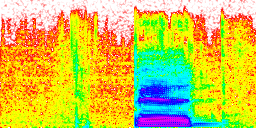

In [18]:
Image(filename=f'{pict_Path}bed/00176480_nohash_0.png')

Convert test wavs to spectrograms: (TAKES LONG TIME AND REQUIRES ~4.5 Gb OF HDD SPACE)

In [19]:
%%bash -s $test_audio_path $test_pict_Path

mirror_path=$2

if [[ ! -d $mirror_path ]];then
	mkdir -p $mirror_path
fi


find $1 -name "*wav" | parallel -I% --max-args 1 sox % -n spectrogram -y 128 -x 256 -h -l -r -o "$mirror_path{/.}.png"


Process is interrupted.


Check test spectrograms folder:

In [23]:
!ls $test_pict_Path | head

clip_d34b4f29a.png
clip_d34bdd5a4.png
clip_d34c2831c.png
clip_d34cb46a3.png
clip_d34cd0d65.png
clip_d34cf8fe5.png
clip_d34d9229f.png
clip_d34e3e54d.png
clip_d34e873fd.png
clip_d34ec1d10.png
ls: write error: Broken pipe


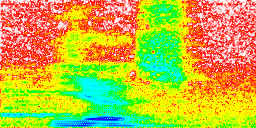

In [22]:
Image(filename=f'{test_pict_Path}/clip_d34b4f29a.png')